# CAPTCHA Project


In [1]:
# load needed libraries.
import os

import numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# sklearn utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# sklearn models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

import glob

## Read images into numpy vector

(1040, 50, 200, 4)


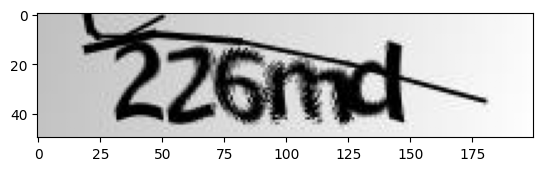

'samples\\*.png'

In [2]:
# Loads images, converts to numpy array, and displays first image
image_files = glob.glob(os.path.join("samples", '*.png'))
file_names = os.path.join("samples", "*.png")
images = numpy.array([plt.imread(img) for img in image_files])
print(images.shape)
plt.imshow(images[0])
plt.show()

file_names

## Slice chatracters and convert to white and black pixels

In [3]:
# Processing the images
IMG_THRESHHOLD = 170

#grayscale versions of images
new_img = []
#list of names of each image
names = []
img_num = 0

# Slice and threshold
char_imgs = []

for img in range(len(images)):
    col_pix_totals = []
    name = image_files[img][8:13]

    # Calculate Pixel Desnities and Threshold the images:
    new_img.append([])
    for w in range(images.shape[2]):
        pixel_density = 0
        for h in range(images.shape[1]):
            if w == 0:
                new_img[img].append([])
            if images[img][h][w][0] < IMG_THRESHHOLD / 255:
                pixel_density += 2 - images[img][h][w][0] * 2
                new_img[img][h].append(0)
            else:
                new_img[img][h].append(1)
        col_pix_totals.append(int(pixel_density))

    # Define beginning and end of characters
    edges = [30]

    end = 0
    for i in range(125, images.shape[2]):
        if col_pix_totals[i] <= 10:
            end = i
            break
    # Determine split size to crop each character
    char_len = int((end - edges[0]) / 5)

    for i in range(1, 5):
        edges.append(char_len * i + edges[0])
    edges.append(end)

    # Crop each character
    for a in range(5):
        names.append(name[a])
        char_imgs.append([])

        # Apply threshold to each pixel
        for h in range(images.shape[1]):
            w = new_img[img][h][edges[a]:edges[a+1]]
            front = True
            # Add's columns of 0's to either side to ensure the images are all the
            # Same size for the below models
            while len(w) < 30:
                if front:
                    w.insert(0, 1)
                    front = False
                else:
                    w.append(1)
                    front = True
            # Add the newly cropped character
            char_imgs[img_num] += w
        img_num+=1

print(names)

['2', '2', '6', 'm', 'd', '2', '2', 'd', '5', 'n', '2', '3', '5', '6', 'g', '2', '3', 'm', 'd', 'g', '2', '3', 'n', '8', '8', '2', '4', '3', 'm', 'm', '2', '4', '4', 'e', '2', '2', '4', '5', 'y', '5', '2', '4', 'f', '6', 'w', '2', '4', 'p', 'e', 'w', '2', '5', '2', '5', '7', '2', '5', '3', 'd', 'c', '2', '5', 'e', 'g', 'p', '2', '5', 'm', '6', 'p', '2', '5', 'p', '2', 'm', '2', '5', 'w', '5', '3', '2', '6', '4', 'm', '5', '2', '6', '8', 'g', '2', '2', '8', '3', '4', '8', '2', '8', 'x', '4', '7', '2', 'b', '8', '2', '7', '2', 'b', 'g', '4', '8', '2', 'c', 'e', 'g', 'f', '2', 'c', 'g', '5', '8', '2', 'c', 'g', 'y', 'x', '2', 'e', 'n', '7', 'g', '2', 'e', 'n', 'f', '4', '2', 'f', 'x', 'g', 'd', '2', 'g', '7', '8', '3', '2', 'g', '7', 'n', 'm', '2', 'g', 'y', 'b', '6', '2', 'm', 'g', '8', '7', '2', 'm', 'p', 'n', 'n', '2', 'n', '7', '3', 'f', '2', 'n', 'b', 'c', 'x', '2', 'n', 'f', '2', '6', '2', 'n', 'p', 'g', '6', '2', 'n', 'x', '3', '8', '2', 'p', '2', 'y', '8', '2', 'p', 'f', 'p', 'n',

## Plot sliced characters

(5200, 1500)


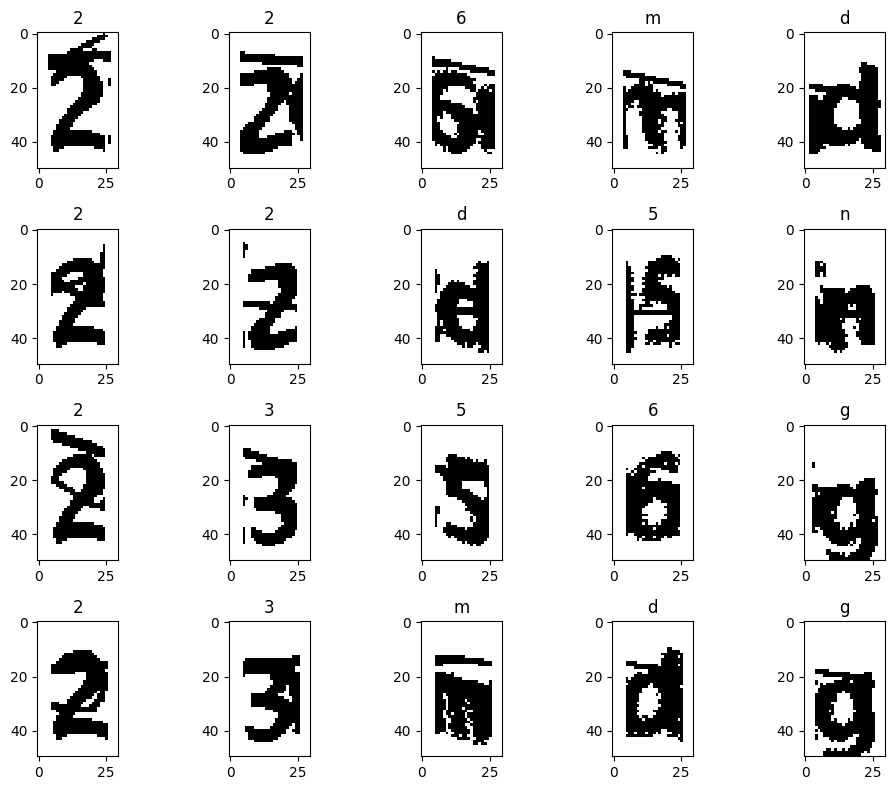

In [4]:
# Convert to numpy array and check shape
new_img = numpy.array(char_imgs)
print(new_img.shape)

# For outputting some of new_image's characters
fig, axes = plt.subplots(4, 5, figsize=(10, 8))  # Adjust figsize as needed

# Loop through the images and corresponding axes to display them
for i, ax in enumerate(axes.flat):
    # Reshape only the appropriate section of new_img[i]
    reshaped_image = np.reshape(new_img[i], (50, 30))
    ax.imshow(reshaped_image, cmap='gray', interpolation="nearest")  # Display each image section in grayscale
    ax.set_title(names[i])

# Display the grid of images
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

# Training and Testing
## Split Data into Testing and Training groups

In [5]:
# Split data into training and testing groups
x_train, x_test, y_train, y_test = train_test_split(new_img, names, test_size = 0.25, random_state = 0)

# Convert lists to numpy arrays
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Confirm shape
print("Training x:", x_train.shape,"y:", y_train.shape)
print("Testing x:", x_test.shape,"y:", y_test.shape)

Training x: (3900, 1500) y: (3900,)
Testing x: (1300, 1500) y: (1300,)


## Test Decision Tree and Random Forest on default parameters

In [6]:
# Fit and test Decision Tree
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
print(f"Decision Tree accuracy: {tree.score(x_test, y_test)}")

# Fit and test Random Forest
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
print(f"Random Forest accuracy: {forest.score(x_test,y_test)}")

Decision Tree accuracy: 0.7661538461538462
Random Forest accuracy: 0.8961538461538462


## Plot Decision Tree performance in a range of max_features values

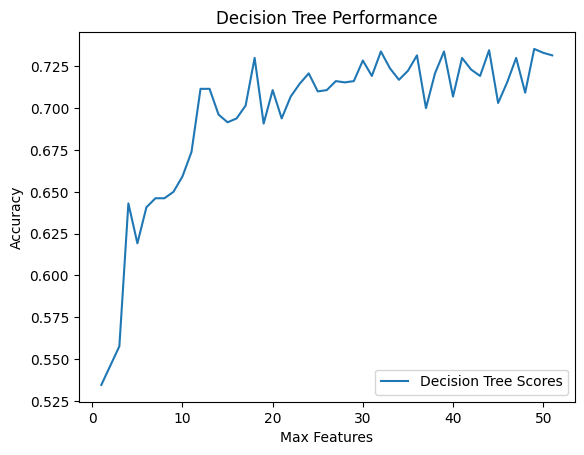

In [7]:
max_tree_features = 52  # Limit max_features to a reasonable number
step = 1

# Each graph
scores = []
# Iterate over a valid range of max_features
for i in range(1, max_tree_features, step):
    treeI = DecisionTreeClassifier(max_features=i)
    treeI.fit(x_train, y_train)
    scores.append(treeI.score(x_test, y_test))
# Label and plot
plt.plot(range(1, max_tree_features, step), scores, label='Decision Tree Scores')
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance')
plt.legend()
plt.show()

## Plot Random Forest performance in a range of max_features values
This cell can take quite a while to run, tweak parameters as needed

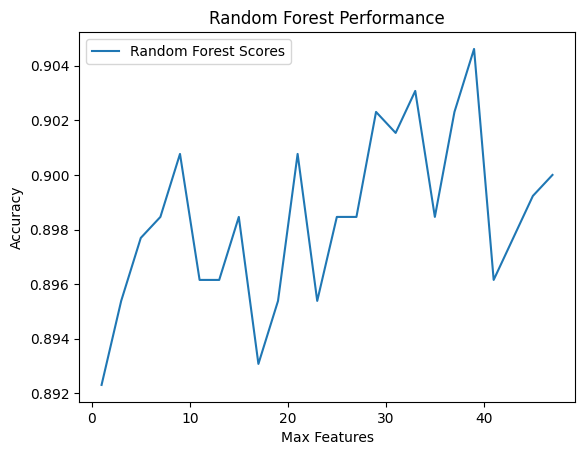

In [8]:
max_forest_features = 48
step = 2

scores = []
# Iterate over a valid range of max_features
for i in range(1, max_forest_features, step):
    treeI = RandomForestClassifier(max_features=i)
    treeI.fit(x_train, y_train)
    scores.append(treeI.score(x_test, y_test))
# Label and plot
plt.plot(range(1, max_forest_features, step), scores, label='Random Forest Scores')
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.title('Random Forest Performance')
plt.legend()
plt.show()

## Convolutional Neural Network
Create Required Functions

In [89]:
def reload_data():
    images = numpy.array([plt.imread(img) for img in image_files])

    return images

def slice(images):
    # Processing the images
    IMG_THRESHHOLD = 170

    #grayscale versions of images
    new_img = np.zeros((len(images) * 5, 50, images.shape[2], 1))
    print(new_img.shape)
    
    #list of names of each image
    names = []

    img_num = 0
    
    # Slice and threshold
    char_imgs = []
    
    for img in range(len(images)):
        col_pix_totals = []
        name = image_files[img][8:13]
    
        # Calculate Pixel Desnities and Threshold the images:
        for w in range(images.shape[2]):
            pixel_density = 0
            for h in range(images.shape[1]):
                if images[img][h][w][0] < IMG_THRESHHOLD / 255:
                    pixel_density += 2 - images[img][h][w][0] * 2
                    new_img[img][h][w][0] = 0
                else:
                    new_img[img][h][w][0] = 1
            col_pix_totals.append(int(pixel_density))
    
        # Define beginning and end of characters
        edges = [30]
    
        end = 0
        for i in range(125, images.shape[2]):
            if col_pix_totals[i] <= 10:
                end = i
                break
        # Determine split size to crop each character
        char_len = int((end - edges[0]) / 5)
    
        for i in range(1, 5):
            edges.append(char_len * i + edges[0])
        edges.append(end)
    
        # Crop each character
        for a in range(5):
            names.append(name[a])
            char_imgs.append([])

            chars=[]
            # Apply threshold to each pixel
            for h in range(images.shape[1]):
                char_imgs[img_num].append([])
                w = new_img[img][h][edges[a]:edges[a+1]].tolist()
                
                front = True
                # Add's columns of 0's to either side to ensure the images are all the
                # Same size for the below models
                while len(w) < 30:
                    if front:
                        w.insert(0, [1])
                        front = False
                    else:
                        w.append([1])
                        front = True
                # Add the newly cropped character
                char_imgs[img_num][h] = w
            img_num+=1
    
    return (np.array(char_imgs), names)

def y_to_1hot(y_not_hot):
    y_1hot = np.zeros((len(y_not_hot), 36))

    keys = ["a", "b", "c", "d", "e", "f", "g", "h", 
            "i", "j", "k", "l", "m", "n", "o", "p", 
            "q", "r", "s", "t", "u", "v", "w", "x", 
            "y", "z", "0", "1", "2", "3", "4", "5",
            "6", "7", "8", "9"]
    
    for i in range(0, len(y_not_hot)):
        key = keys.index(y_not_hot[i])

        y_1hot[i][key] = 1

    return y_1hot

Create, Train & Test model

(5200, 50, 200, 1)
(5200, 50, 30, 1)
['2', '2', '6', 'm', 'd', '2', '2', 'd', '5', 'n', '2', '3', '5', '6', 'g', '2', '3', 'm', 'd', 'g', '2', '3', 'n', '8', '8', '2', '4', '3', 'm', 'm', '2', '4', '4', 'e', '2', '2', '4', '5', 'y', '5', '2', '4', 'f', '6', 'w', '2', '4', 'p', 'e', 'w', '2', '5', '2', '5', '7', '2', '5', '3', 'd', 'c', '2', '5', 'e', 'g', 'p', '2', '5', 'm', '6', 'p', '2', '5', 'p', '2', 'm', '2', '5', 'w', '5', '3', '2', '6', '4', 'm', '5', '2', '6', '8', 'g', '2', '2', '8', '3', '4', '8', '2', '8', 'x', '4', '7', '2', 'b', '8', '2', '7', '2', 'b', 'g', '4', '8', '2', 'c', 'e', 'g', 'f', '2', 'c', 'g', '5', '8', '2', 'c', 'g', 'y', 'x', '2', 'e', 'n', '7', 'g', '2', 'e', 'n', 'f', '4', '2', 'f', 'x', 'g', 'd', '2', 'g', '7', '8', '3', '2', 'g', '7', 'n', 'm', '2', 'g', 'y', 'b', '6', '2', 'm', 'g', '8', '7', '2', 'm', 'p', 'n', 'n', '2', 'n', '7', '3', 'f', '2', 'n', 'b', 'c', 'x', '2', 'n', 'f', '2', '6', '2', 'n', 'p', 'g', '6', '2', 'n', 'x', '3', '8', '2', 'p', '2

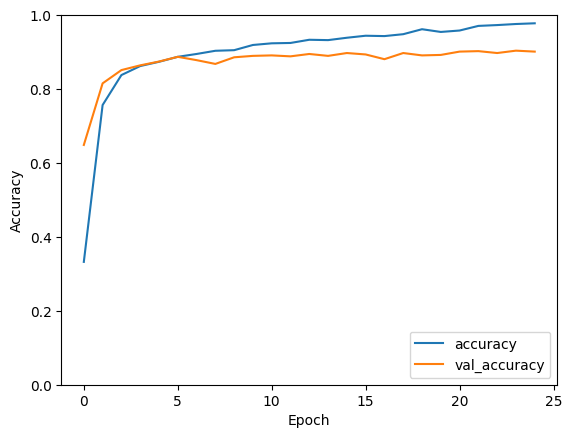

In [91]:
# Reload data
thresholded_imgs, names = slice(reload_data())
print(thresholded_imgs.shape)
# Split data into training and testing groups
x_train, x_test, y_train, y_test = train_test_split(thresholded_imgs, names, test_size = 0.25)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

# Convert lists to numpy arrays
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Convert to 1hot
y_train = y_to_1hot(y_train)
y_val = y_to_1hot(y_val)
y_test = y_to_1hot(y_test)

print(names)

# Create Model Structure
model = models.Sequential()
model.add(layers.Conv2D(15, (5, 5), (2, 2), activation='relu', input_shape=(50, 30, 1)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(30, (3, 3), (1, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation="relu"))
model.add(layers.Dense(36))

# Compile Model with exponential decay
schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=2000,
    decay_rate=0.95,
    staircase = True)

model.compile(optimizer=optimizers.Adam(learning_rate= schedule),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train model on split characters
history = model.fit(x_train, y_train, epochs=25, batch_size=128, validation_data=(x_val, y_val))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [92]:
print(y_train.shape)

(3120, 36)
